In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

df = pd.read_csv('data/preproc2_train.csv')
df.building_id = df.building_id.astype('str')
df.cluster = df.cluster.astype('str')
df.type = df.type.astype('str')

df = df.drop(['Time'], axis = 1)

In [32]:
df

,building_id,cluster,sin_time,cos_time,day,month,holiday,Temperature,Precipitation,Wind speed,Humidity,DI,Solar radiation,consumption,CDH,ESS,type
0,1,1.0,0.000000,1.000000,2,6,0,18.6,0.0,0.9,42.0,63.09388,-0.1,1085.28,-7.4,0.0,0
1,1,1.0,0.258819,0.965926,2,6,0,18.0,0.0,1.1,45.0,62.46400,-0.1,1047.36,-15.4,0.0,0
2,1,1.0,0.500000,0.866025,2,6,0,17.7,0.0,1.5,45.0,62.08735,-0.1,974.88,-23.7,0.0,0
3,1,1.0,0.707107,0.707107,2,6,0,16.7,0.0,1.4,48.0,60.89884,-0.1,953.76,-33.0,0.0,0
4,1,1.0,0.866025,0.500000,2,6,0,18.4,0.0,2.8,43.0,62.88788,-0.1,986.40,-40.6,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,1.0,-0.965926,0.258819,2,8,0,23.1,0.0,0.9,86.0,72.38034,-0.1,881.04,-19.6,0.0,11
203996,100,1.0,-0.866025,0.500000,2,8,0,22.4,0.0,1.3,86.0,71.21736,-0.1,798.96,-20.2,0.0,11
203997,100,1.0,-0.707107,0.707107,2,8,0,21.3,0.0,1.0,92.0,69.79704,-0.1,825.12,-22.3,0.0,11
203998,100,1.0,-0.500000,0.866025,2,8,0,21.0,0.0,0.3,94.0,69.41060,-0.1,640.08,-25.1,0.0,11


In [33]:
# df.drop(['ESS', 'Total area', 'Cooling area', 'Solar', 'PCS', 'type', 'cluster', 'date'], axis=1, inplace=True)
df.drop(['ESS', 'type', 'cluster'], axis=1, inplace=True)

In [34]:
def importance(model, df, name):

    importances = np.zeros(len(df.columns) - 2)
    
    for i in range(1, 101):
        tmp_df = df.loc[df.building_id == str(i)].drop('building_id', axis = 1)
        X = tmp_df.drop('consumption', axis = 1)
        y = tmp_df.consumption
        
        model.fit(X, y)

        for j, imp in enumerate(model.feature_importances_):
            importances[j] += imp
        
        indices = np.argsort(importances)[::-1]

    for i, imp in enumerate(importances):
        importances[i] /= 100

    # Print the feature ranking
    print(f"{name} Feature ranking:")

    for f in range(X.shape[1]):
        print("{}. feature {} ({:.3f})".format(f + 1, X.columns[indices][f], importances[indices[f]]))

    # Plot the impurity-based feature importances of the model
    plt.figure()
    plt.title(name)
    plt.bar(range(X.shape[1]), importances[indices],
            color="b", align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
    plt.xlim([-1, X.shape[1]])
    plt.show()
    
    return importances

Random Forest Regressor Feature ranking:
1. feature cos_time (0.236)
2. feature Solar radiation (0.213)
3. feature sin_time (0.141)
4. feature DI (0.134)
5. feature holiday (0.132)
6. feature CDH (0.041)
7. feature day (0.026)
8. feature month (0.024)
9. feature Humidity (0.021)
10. feature Temperature (0.018)
11. feature Wind speed (0.010)
12. feature Precipitation (0.002)


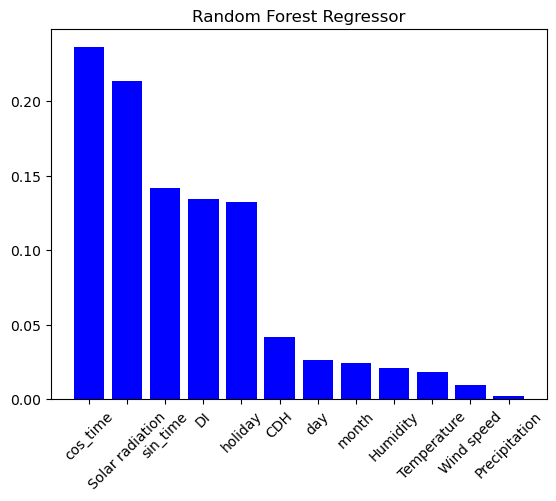

In [35]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
importance_rf = importance(forest, df, 'Random Forest Regressor')

Gradient Boosting Regressor Feature ranking:
1. feature cos_time (0.262)
2. feature Solar radiation (0.197)
3. feature sin_time (0.144)
4. feature holiday (0.138)
5. feature DI (0.131)
6. feature CDH (0.034)
7. feature day (0.030)
8. feature month (0.029)
9. feature Temperature (0.016)
10. feature Humidity (0.014)
11. feature Wind speed (0.003)
12. feature Precipitation (0.001)


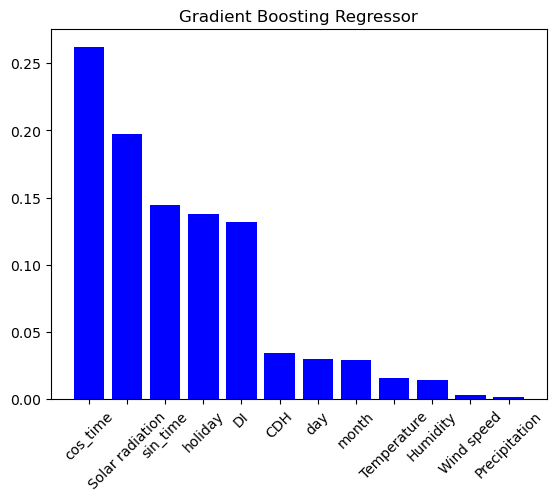

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
importance_gb = importance(gb, df, 'Gradient Boosting Regressor')

XGBRegressor Feature ranking:
1. feature holiday (0.351)
2. feature Solar radiation (0.189)
3. feature cos_time (0.187)
4. feature sin_time (0.081)
5. feature DI (0.072)
6. feature month (0.052)
7. feature CDH (0.020)
8. feature day (0.020)
9. feature Humidity (0.011)
10. feature Temperature (0.008)
11. feature Precipitation (0.005)
12. feature Wind speed (0.004)


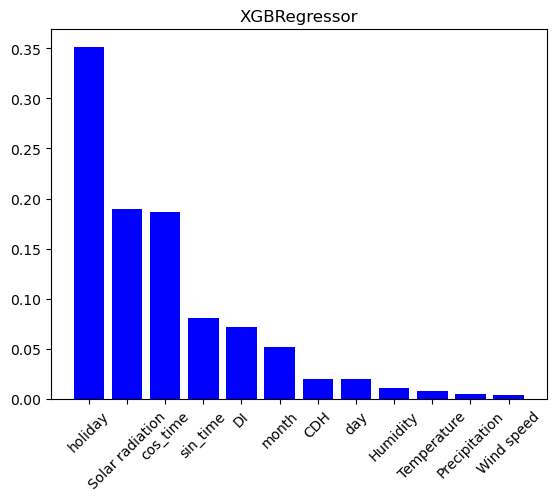

In [37]:
from xgboost import XGBRegressor

xg = XGBRegressor()
importance_bx = importance(xg, df, 'XGBRegressor')